In [100]:
%matplotlib inline
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression

In [132]:
# Modifica estos parámetros para que coincidan con los de tu docker
pg_params = {
    "user": "postgres",
    "password": "password",
    "host": "0.0.0.0",
    "port": "5432",
    "db": "postgres"
}
engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{db}'.format(**pg_params))

In [163]:
# Lee los datos
data = pd.read_sql_query("select * from data", con=engine)

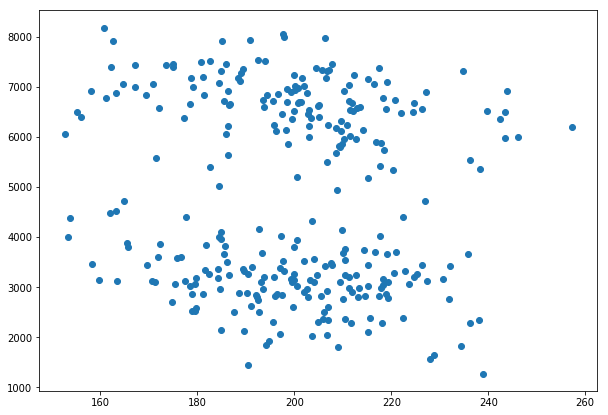

In [164]:
# Relación de x con y
plt.figure(figsize=(10, 7))
plt.scatter(data.x, data.y)

/home/arinarmo/.pyenv/versions/3.6.2/envs/tarea3_docker/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


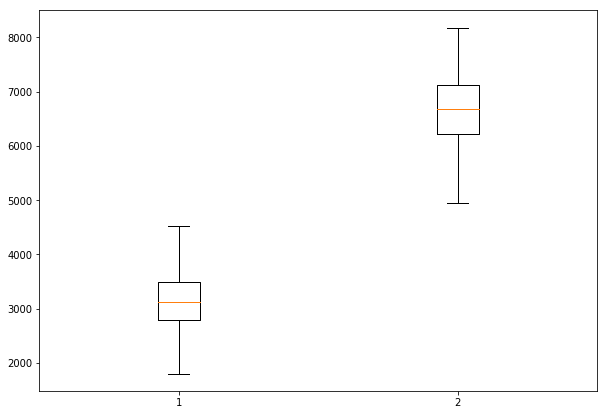

In [165]:
# Relación de c con y
plt.figure(figsize=(10, 7))
plt.boxplot([data[data.c == "A"].y, data[data.c=="B"].y], sym='')
plt.show()

In [166]:
# Regresiones Lineales
# Las betas de x deben de ser similares a la establecida en el generador

regr = LinearRegression(normalize=True)
regr.fit(data[data.c == 'A'][["x"]], data[data.c == 'A'].y)
print("Regresión A: bias: {}, beta_x: {}".format(regr.intercept_, *regr.coef_))
biasA = regr.intercept_
predA = regr.predict(data[data.c == 'A'][["x"]])


regr = LinearRegression(normalize=True)
regr.fit(data[data.c == 'B'][["x"]], data[data.c == 'B'].y)
print("Regresión B: bias: {}, beta_x: {}".format(regr.intercept_, *regr.coef_))
biasB = regr.intercept_
predB = regr.predict(data[data.c == 'B'][["x"]])

data.loc[data.c == 'A', 'pred'] = predA
data.loc[data.c == 'B', 'pred'] = predB

Regresión A: bias: 5446.944089512718, beta_x: -11.718394806805868
Regresión B: bias: 8916.334270465268, beta_x: -11.297286720004642


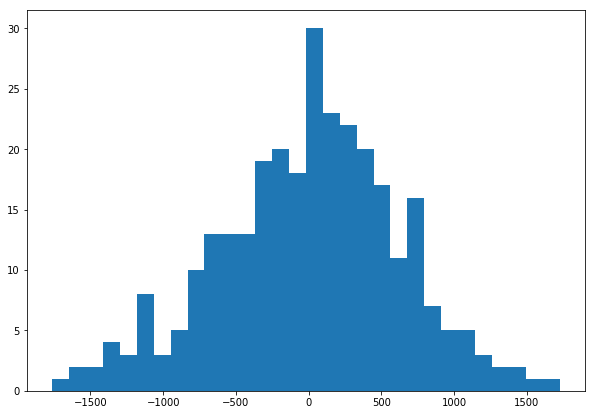

In [167]:
# Residuales
plt.figure(figsize=(10, 7))
plt.hist(data.y - data.pred, bins=30)
plt.show()